# Forest Cover Project

For this proejct I wiil be using deep learning to predit forest cover types based on cartographic variables.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

First I will load the data from the csv file into a pandas dataframe

In [ ]:
# load data
data = pd.read_csv('cover_data.csv')

Lets take a look at the first few rows and the get an idea of what the data looks like using the `.head()` method of the dataframe.

We can see that there are 55 columns which is a lot of features to train on.

In [ ]:
# view data
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
# output column info
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105336 entries, 0 to 105335
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           105336 non-null  int64  
 1   Aspect                              105336 non-null  int64  
 2   Slope                               105336 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    105336 non-null  int64  
 4   Vertical_Distance_To_Hydrology      105336 non-null  int64  
 5   Horizontal_Distance_To_Roadways     105336 non-null  int64  
 6   Hillshade_9am                       105336 non-null  int64  
 7   Hillshade_Noon                      105336 non-null  int64  
 8   Hillshade_3pm                       105336 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  105336 non-null  int64  
 10  Wilderness_Area1                    105336 non-null  float64
 11  Wilderness_Area2               

There are 55 columns here is what each column means:

- Elevation / quantitative /meters / Elevation in meters
- Aspect / quantitative / azimuth / Aspect in degrees azimuth
- Slope / quantitative / degrees / Slope in degrees
- Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
- Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at - 9am, summer solstice
- Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer solstice
- Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
- Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
- Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

There are a lot of features, we probably won't need all of them, we wil determine later which features will be needed to train our model the produce the best results.

Our labels variable is the `class` variable, this is what we will be predicting using our classification model.

Lets take a look at its distribution

<ipython-input-7-58295d4288af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['class'], color='g', bins=100, hist_kws={'alpha': 0.4});


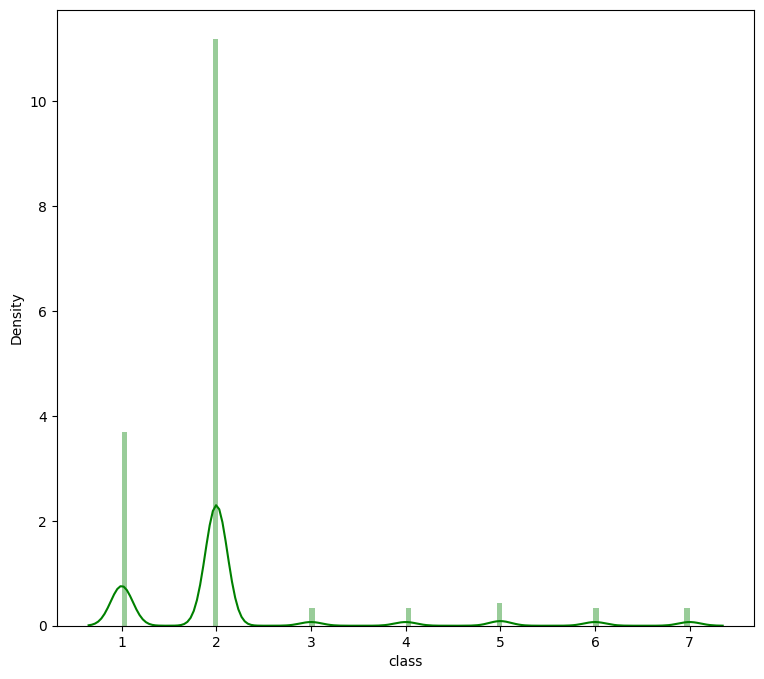

In [ ]:
data['class'].describe()
plt.figure(figsize=(9, 8))
sns.distplot(data['class'], color='g', bins=100, hist_kws={'alpha': 0.4});

Majority of out cover types in the dataset is either type 1 or 2, so there is large imbalance in the cover types whic types 3 to 7 being much smaller percentage of the data.

## Distribution of quantitative variables

Now lets take a look at the distribution of all our features by plotting them.

array([[<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Aspect'}>,
        <Axes: title={'center': 'Slope'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Vertical_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Roadways'}>,
        <Axes: title={'center': 'Hillshade_9am'}>],
       [<Axes: title={'center': 'Hillshade_Noon'}>,
        <Axes: title={'center': 'Hillshade_3pm'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Fire_Points'}>,
        <Axes: title={'center': 'Wilderness_Area1'}>,
        <Axes: title={'center': 'Wilderness_Area2'}>,
        <Axes: title={'center': 'Wilderness_Area3'}>,
        <Axes: title={'center': 'Wilderness_Area4'}>],
       [<Axes: title={'center': 'Soil_Type1'}>,
        <Axes: title={'center': 'Soil_Type2'}>,
        <Axes: title={'center': 'Soil_Type3'}>,
        <Axes: title={'center': 'Soil_Type4'}>,
        <Axes: title={'

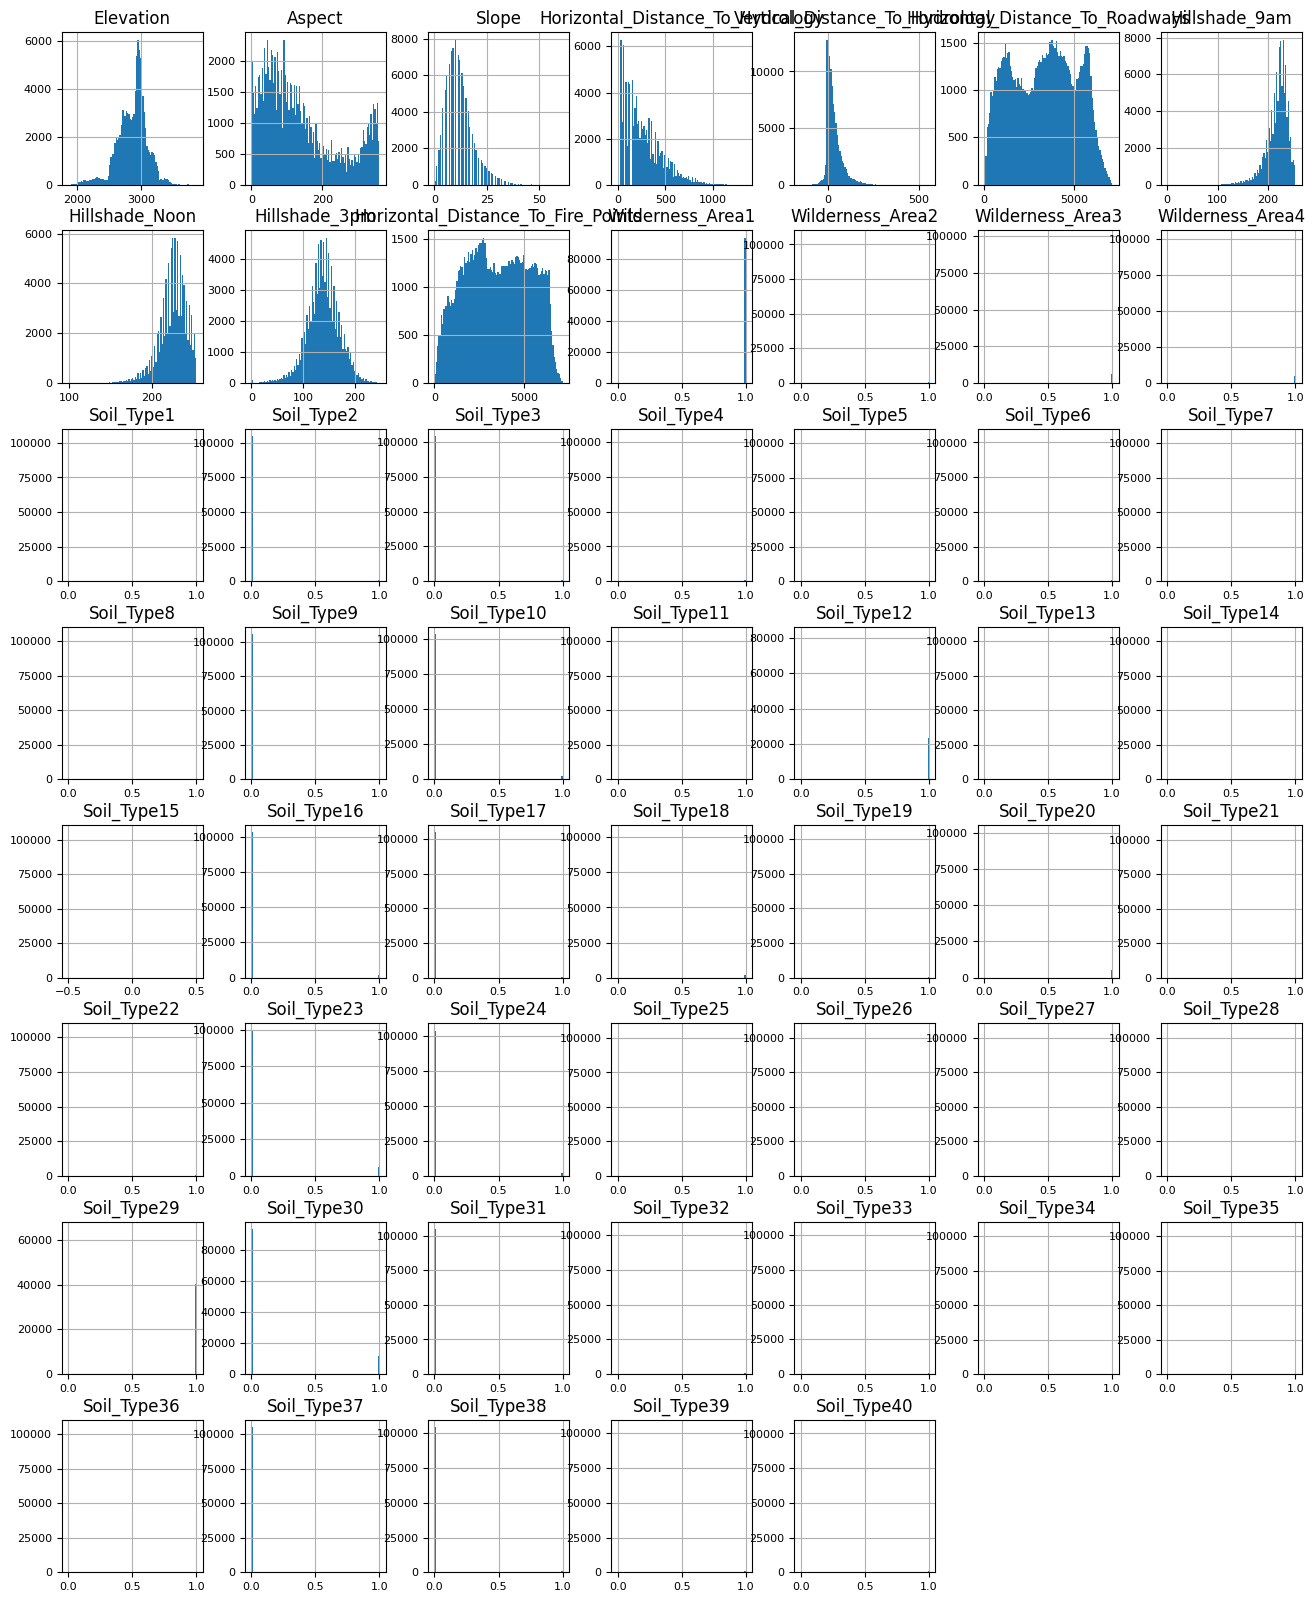

In [ ]:
data_num = data.drop(['class'], axis=1)

data_num.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

## Build model

Now lets build the classification model.

In [ ]:
# define function to create model
def build_model(num_features):
  '''
  function to build model architecture and compiles it
  Input: Number of features
  Output: Keras model object
  '''

  model = keras.Sequential()
  model.add(layers.Dense(64, input_dim=num_features, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(8, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# define function to process data for model
def prep_data(raw_df):
    """
    Prepare data that can be readily consumed by ML/DL algorithms.
    - separate features from class variables
    - split into training and testing dataset
    - scale numerical data

    param: a dataframe of input data
    output: X_train_normalized, X_test_normalized, y_train, y_test
    """
    raw_data = raw_df.values
    X = raw_df.drop(['class'], axis=1)
    y = raw_df['class']

    # Split into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

    # normalize data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    return X_train_normalized, X_test_normalized, y_train, y_test


In [ ]:
# create testing and training sets
cols = data.columns.tolist()
features, label = cols[:-1], cols[-1]
X_train, X_test, y_train, y_test = prep_data(data)

# build model
num_feautures = len(features)
model = build_model(num_feautures)

# output model summary
print('Keras model summary:')
model.summary()

Keras model summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                3520      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
Total params: 5864 (22.91 KB)
Trainable params: 5864 (22.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

In [ ]:
# set training parameters
epochs = 100
batch_size = 1024
earlystopping = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=4)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[earlystopping], verbose=1)

Epoch 1/100
66/66 [==============================] - 1s 7ms/step - loss: 1.5980 - accuracy: 0.4877 - val_loss: 0.7773 - val_accuracy: 0.7202
Epoch 2/100
66/66 [==============================] - 0s 6ms/step - loss: 0.8141 - accuracy: 0.6988 - val_loss: 0.5833 - val_accuracy: 0.7784
Epoch 3/100
66/66 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.7360 - val_loss: 0.5313 - val_accuracy: 0.7966
Epoch 4/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6223 - accuracy: 0.7570 - val_loss: 0.5005 - val_accuracy: 0.8112
Epoch 5/100
66/66 [==============================] - 0s 6ms/step - loss: 0.5852 - accuracy: 0.7725 - val_loss: 0.4793 - val_accuracy: 0.8194
Epoch 6/100
66/66 [==============================] - 0s 5ms/step - loss: 0.5608 - accuracy: 0.7825 - val_loss: 0.4637 - val_accuracy: 0.8243
Epoch 7/100
66/66 [==============================] - 0s 5ms/step - loss: 0.5398 - accuracy: 0.7925 - val_loss: 0.4502 - val_accuracy: 0.8280
Epoch 8/100
6

Now lets plot the accuracy and loss to see how the model performs

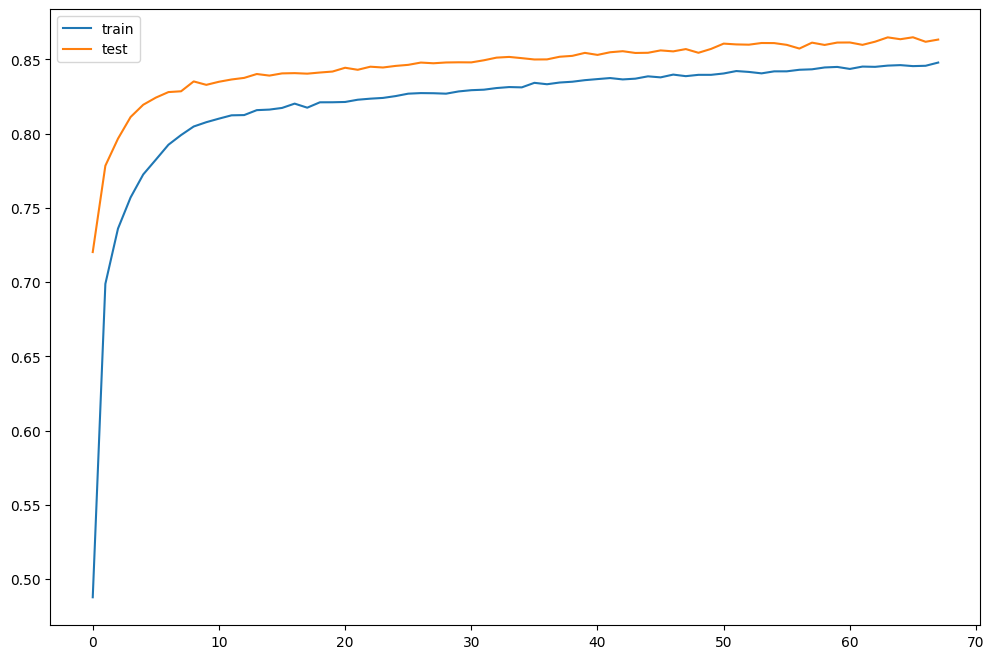

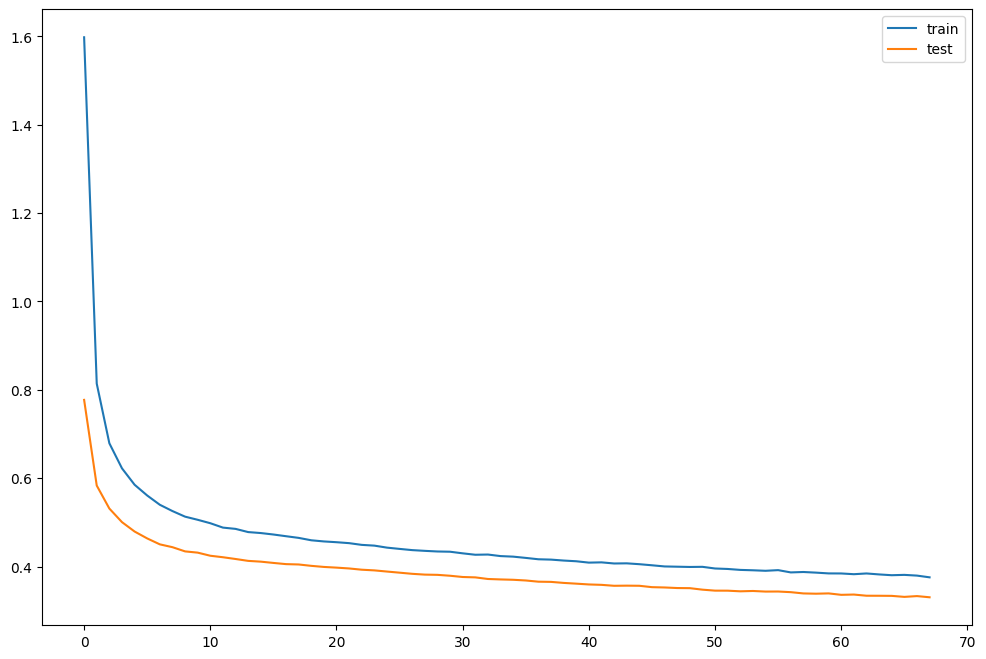

In [ ]:
# plot history for accuracy
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# plot history for loss
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# score model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# convert class number to discrete labels
class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(y_test, y_pred, target_names=class_names))

Test loss: 0.3309469521045685
Test accuracy: 0.8626352548599243
659/659 [==============================] - 1s 1ms/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.88      0.59      0.71      4662
   Lodgepole Pine       0.87      0.97      0.92     14136
   Ponderosa Pine       0.69      0.44      0.54       432
Cottonwood/Willow       0.81      0.96      0.88       432
            Aspen       0.85      0.64      0.73       542
      Douglas-fir       0.60      0.77      0.68       432
        Krummholz       0.91      0.87      0.89       432

         accuracy                           0.86     21068
        macro avg       0.80      0.75      0.76     21068
     weighted avg       0.86      0.86      0.85     21068



[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

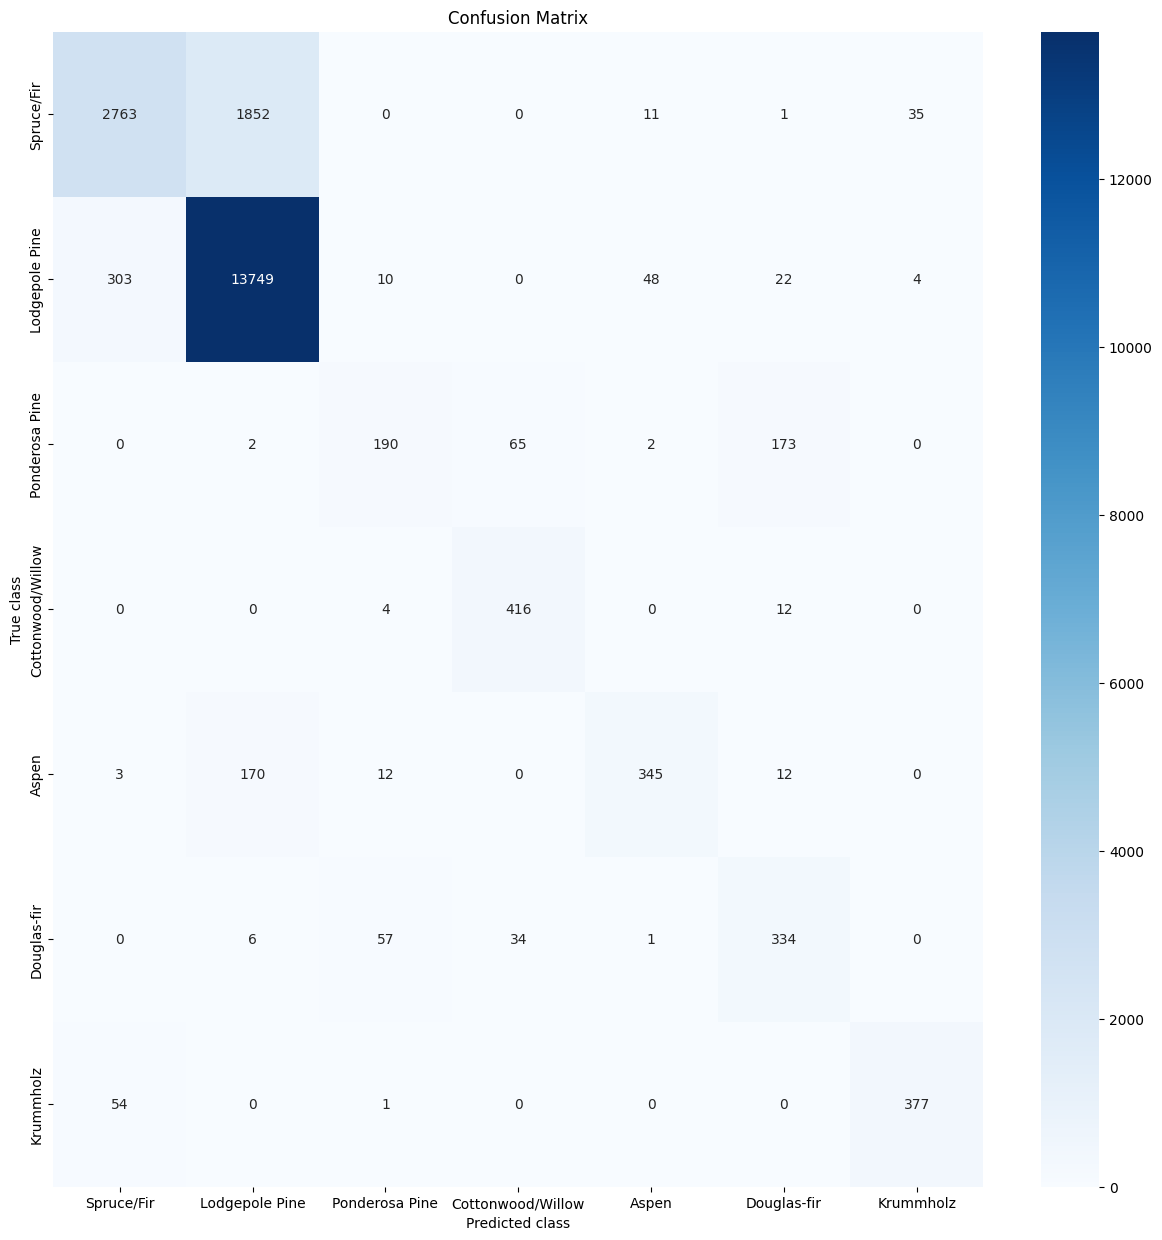

In [ ]:
# display confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

## Conclusions

The numbers diagonal in the confusion matrix shows how many were correctly classified while the other numbers are misclassifications. We see that Lodgepole Pine, Cottonwood Willow, Aspen, and Douglas-Fir suffer from a high percentage of mis-classifications.

This can be the result of many things:

- Class imbalances, as seen before, there is a large class imbalance, with class 1 and 2 being Spruce/fir and Lodgepole Pine being being the cover type for the vast majority of our data.
- Collinearity, similiarities in variables can lead the model to trip up and removing them would improve the model.
- For imbalanced data `accuracy` is not an ideal metric, and using Precision/Recall, or F1 score may yield better results.
- To deal with the label imbalance we can use upsampling or downsampling techniques to get better results.

In the end the majority class influences the model the most and affect how the weights are updated which why the results are what they are.